In [ ]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git
!pip install -q --upgrade git+https://github.com/FloorToxopeus/TM10007_ML_Project.git

from worcgist.load_data import load_data

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

The number of samples: 246
The number of columns: 494


In [ ]:
# General packages
import numpy as np
import pandas as pd
from scipy.stats import shapiro
from scipy import interp
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import make_pipeline

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# Hyperparamters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

# Visualisation
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from tabulate import tabulate
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

False
6727
<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, GIST-001_0 to GIST-246_0
Columns: 410 entries, label to PREDICT_original_phasef_phasesym_entropy_WL3_N5
dtypes: float64(390), int64(19), object(1)
memory usage: 789.9+ KB
None
-----  ----------  ------------  ---------  ----------  ---------  ---------  -----------  -------------  -----------  ------------  -----------  ------------  ------------  ------------  -----------  ------------  ----------  ----------------  -----------  ----------------  ----------  -----------  ----------  --------  ---------  --------  --------  -----------  ----------  --------  ---------  --------  ----------------  --------  ---------  --------------  -------------  -------------  ----------  --------  ----------  ---------  -------------  ---------  ---------------  ------------  ---------  ----------  -------------  ----------  ---------  ----------  --------  --------------  -------------  ------------  ---------  ---------------  --

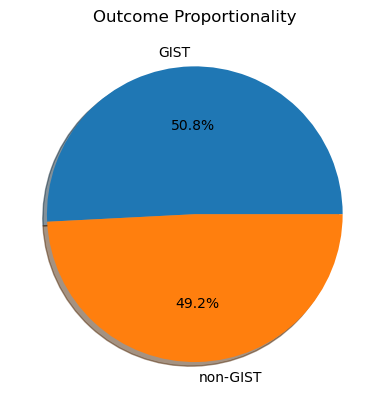

In [ ]:

# Missing/zero values
columns_with_missing_values = data.isnull().values.any()
print(columns_with_missing_values)

place_nulls = np.where(data == 0)[1]
print(len(place_nulls))
col_nulls = set(place_nulls)
list_col_nulls = sorted(col_nulls)
data.drop(data.columns[list_col_nulls], axis=1, inplace=True)

#Describtive overview / outliers
print(data.info())
table = tabulate(data.describe())
print(table)

# Gaussian?

# Selecteer alleen de kolommen met de functies (features)
features_data = data.drop('label', axis=1)

# normality test
stat, p = shapiro(features_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

 # Correlation
data['label'] = data['label'].map({'GIST': 1, 'non-GIST': 0})     #gist en non-gist to 1 en 0
corr = data.corr()
# kan heatmap van maken, maar met 500 features ook niet heel handig

corr['label'].sort_values(ascending=False)   #hiermee correlatie tov label bekijken, hoogste correlatie bovenaan, dit zijn dus belangrijke featuers voor de uitkomst

# Cirkeldiagram met verdeling GIST en non-GIST
plt.pie(data['label'].value_counts(),
        labels=['GIST', 'non-GIST'],
        autopct='%.1f%%', shadow=True)
plt.title('Outcome Proportionality')
plt.show()


In [ ]:

# Cleaning dataset
cleaning = data.reset_index()
tf = cleaning.iloc[:,1]
clean_data = cleaning.drop(['ID', 'label'], axis='columns')
b = tf.to_numpy()
a = clean_data.to_numpy()
print(b)


[1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1
 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1
 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1
 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0]


In [ ]:
# Split in designset en testset (90%, 10%)
x_design, x_test, y_design, y_test = model_selection.train_test_split(a, b, test_size=0.1, stratify=b, random_state=42)

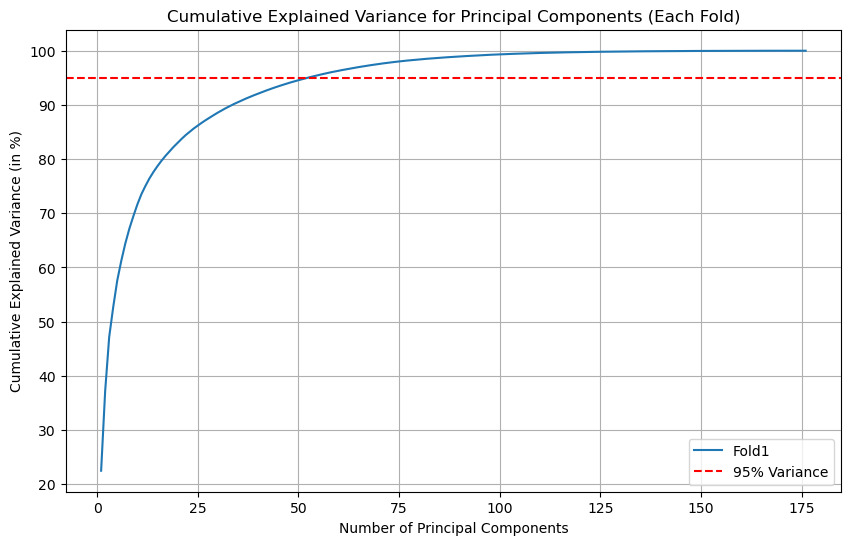

Now training RFE_KNN_fold1
Training completed of RFE_KNN_fold1 in 0.23 minutes
Now training RFE_RdmFor_fold1
Training completed of RFE_RdmFor_fold1 in 0.26 minutes
Now training RFE_SVM_fold1
Training completed of RFE_SVM_fold1 in 0.20 minutes
Now training ANOVA_KNN_fold1
Training completed of ANOVA_KNN_fold1 in 0.02 minutes
Now training ANOVA_RdmFor_fold1
Training completed of ANOVA_RdmFor_fold1 in 0.06 minutes
Now training ANOVA_SVM_fold1
Training completed of ANOVA_SVM_fold1 in 0.00 minutes
Now training PCA_KNN_fold1
Training completed of PCA_KNN_fold1 in 0.02 minutes
Now training PCA_RdmFor_fold1
Training completed of PCA_RdmFor_fold1 in 0.08 minutes
Now training PCA_SVM_fold1
Training completed of PCA_SVM_fold1 in 0.00 minutes


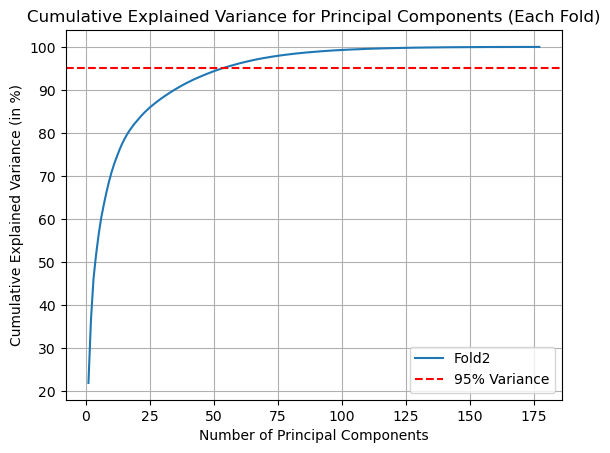

Now training RFE_KNN_fold2
Training completed of RFE_KNN_fold2 in 0.21 minutes
Now training RFE_RdmFor_fold2
Training completed of RFE_RdmFor_fold2 in 0.27 minutes
Now training RFE_SVM_fold2
Training completed of RFE_SVM_fold2 in 0.19 minutes
Now training ANOVA_KNN_fold2
Training completed of ANOVA_KNN_fold2 in 0.02 minutes
Now training ANOVA_RdmFor_fold2
Training completed of ANOVA_RdmFor_fold2 in 0.05 minutes
Now training ANOVA_SVM_fold2
Training completed of ANOVA_SVM_fold2 in 0.00 minutes
Now training PCA_KNN_fold2
Training completed of PCA_KNN_fold2 in 0.02 minutes
Now training PCA_RdmFor_fold2
Training completed of PCA_RdmFor_fold2 in 0.12 minutes
Now training PCA_SVM_fold2
Training completed of PCA_SVM_fold2 in 0.00 minutes


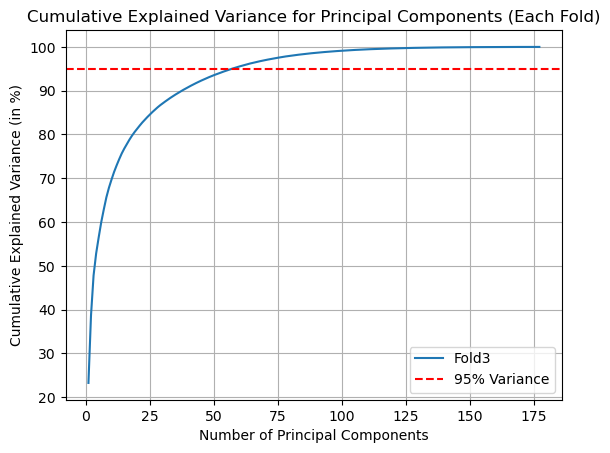

Now training RFE_KNN_fold3
Training completed of RFE_KNN_fold3 in 0.20 minutes
Now training RFE_RdmFor_fold3
Training completed of RFE_RdmFor_fold3 in 0.29 minutes
Now training RFE_SVM_fold3
Training completed of RFE_SVM_fold3 in 0.17 minutes
Now training ANOVA_KNN_fold3
Training completed of ANOVA_KNN_fold3 in 0.02 minutes
Now training ANOVA_RdmFor_fold3
Training completed of ANOVA_RdmFor_fold3 in 0.11 minutes
Now training ANOVA_SVM_fold3
Training completed of ANOVA_SVM_fold3 in 0.00 minutes
Now training PCA_KNN_fold3
Training completed of PCA_KNN_fold3 in 0.02 minutes
Now training PCA_RdmFor_fold3
Training completed of PCA_RdmFor_fold3 in 0.05 minutes
Now training PCA_SVM_fold3
Training completed of PCA_SVM_fold3 in 0.00 minutes


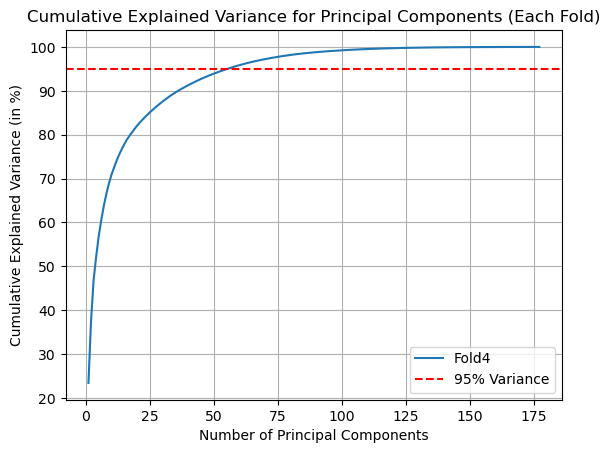

Now training RFE_KNN_fold4
Training completed of RFE_KNN_fold4 in 0.23 minutes
Now training RFE_RdmFor_fold4
Training completed of RFE_RdmFor_fold4 in 0.31 minutes
Now training RFE_SVM_fold4
Training completed of RFE_SVM_fold4 in 0.23 minutes
Now training ANOVA_KNN_fold4
Training completed of ANOVA_KNN_fold4 in 0.02 minutes
Now training ANOVA_RdmFor_fold4
Training completed of ANOVA_RdmFor_fold4 in 0.07 minutes
Now training ANOVA_SVM_fold4
Training completed of ANOVA_SVM_fold4 in 0.00 minutes
Now training PCA_KNN_fold4
Training completed of PCA_KNN_fold4 in 0.02 minutes
Now training PCA_RdmFor_fold4
Training completed of PCA_RdmFor_fold4 in 0.07 minutes
Now training PCA_SVM_fold4
Training completed of PCA_SVM_fold4 in 0.00 minutes


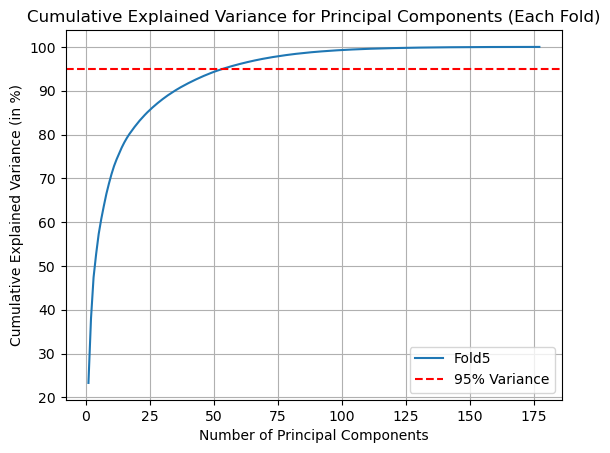

Now training RFE_KNN_fold5
Training completed of RFE_KNN_fold5 in 0.22 minutes
Now training RFE_RdmFor_fold5
Training completed of RFE_RdmFor_fold5 in 0.29 minutes
Now training RFE_SVM_fold5
Training completed of RFE_SVM_fold5 in 0.20 minutes
Now training ANOVA_KNN_fold5
Training completed of ANOVA_KNN_fold5 in 0.02 minutes
Now training ANOVA_RdmFor_fold5
Training completed of ANOVA_RdmFor_fold5 in 0.10 minutes
Now training ANOVA_SVM_fold5
Training completed of ANOVA_SVM_fold5 in 0.00 minutes
Now training PCA_KNN_fold5
Training completed of PCA_KNN_fold5 in 0.02 minutes
Now training PCA_RdmFor_fold5
Training completed of PCA_RdmFor_fold5 in 0.11 minutes
Now training PCA_SVM_fold5
Training completed of PCA_SVM_fold5 in 0.00 minutes


In [ ]:
###################################################################################

# Define cross-validation
cv = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)


# Initialize dictionary to store models
models = {}
accuracies = {}
precisions = {}
recalls = {}
f1_scores = {}
fprs = {}
tprs = {}
thresholds = {}
aucs = {}

plt.figure(figsize=(10, 6))

# For each fold
for i, (train, validation) in enumerate(cv.split(x_design, y_design)):

  # Scaling
  scaler = preprocessing.StandardScaler()
  x_train = scaler.fit_transform(x_design[train],y_design[train])
  x_validation= scaler.fit_transform(x_design[validation],y_design[validation])
  y_train = y_design[train]
  y_validation = y_design[validation]

  # PCA
  pca_p = PCA()
  pca_p.fit(x_train)

  # Calculate cumulative explained variance
  explained_variance = pca_p.explained_variance_ratio_
  cumulative_variance = np.cumsum(explained_variance) * 100

  # Plot the cumulative explained variance for this fold
  plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, label=f'Fold{i+1}')
  plt.title('Cumulative Explained Variance for Principal Components (Each Fold)')
  plt.xlabel('Number of Principal Components')
  plt.ylabel('Cumulative Explained Variance (in %)')
  # plt.xticks(range(1, len(explained_variance) + 1))
  plt.axhline(y=95, color='r', linestyle='--', label='95% Variance')
  plt.grid(True)
  plt.legend()
  plt.show()

  ################################
  # Hyperparameters
  # Knn
  parameters_knn = {'n_neighbors': list(range(1, 26, 2)), 'weights': ['uniform','distance']}
  clf_knn = KNeighborsClassifier()
  para_knn = RandomizedSearchCV(clf_knn, parameters_knn,  error_score='raise', cv=5)

  # RFC
  parameters_rf = {'max_depth':[3,5,10,None], 'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,3,4]}
  clf_rf = RandomForestClassifier()
  para_rf = RandomizedSearchCV(clf_rf, parameters_rf,  error_score='raise', cv=5)

  # SVM
  parameters_svm = {'C': [1, 10, 100],
                  'kernel': ['rbf', 'poly', 'sigmoid'],
                  'gamma': ['scale', 'auto']}
  clf_svm = svm.SVC()
  para_svm = RandomizedSearchCV(clf_svm, parameters_svm,  error_score='raise', cv=5)

  # Feature selection

  features = [RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10), SelectKBest(score_func=f_classif, k=10), PCA(n_components=np.argmax(cumulative_variance >= 95) + 1)]
  feat_names = ['RFE', 'ANOVA','PCA']

  # Classifiers
  clsfs = [KNeighborsClassifier(), RandomForestClassifier(), svm.SVC()]
  #
  clf_names = ['KNN', 'RdmFor','SVM']


  # For each feature and classifier
  for feat, feat_name in zip(features, feat_names):
    for clf, clf_name in zip(clsfs, clf_names):

      start_time = time.time()  # capture the start time

      #  a unique name for each model
      model_name = f"{feat_name}_{clf_name}_fold{i+1}"
      print(f'Now training {model_name}')

      # KNeighbours
      if clf_name == 'KNN':
        best_knn = para_knn.fit(x_train,y_train)
        optim_nn = best_knn.best_estimator_.get_params()
        classif = KNeighborsClassifier(n_neighbors=optim_nn['n_neighbors'],
                                       weights=optim_nn['weights'])
      # RandomForest
      if clf_name == 'RdmFor':
        best_rf = para_rf.fit(x_train,y_train)
        optim_rf = best_rf.best_estimator_.get_params()
        classif = RandomForestClassifier(max_depth=optim_rf['max_depth'],
                                         n_estimators=optim_rf['n_estimators'],
                                         max_features=optim_rf['max_features'],
                                         min_samples_leaf=optim_rf['min_samples_leaf'],
                                         min_samples_split=optim_rf['min_samples_split'])
      # SVM
      if clf_name == 'SVM':
        best_svm = para_svm.fit(x_train,y_train)
        optim_svm = best_svm.best_estimator_.get_params()
        classif = svm.SVC(C=optim_svm['C'],
                          kernel=optim_svm['kernel'],
                          gamma=optim_svm['gamma'], probability=True)


      # Make pipeline
      pipe = make_pipeline(feat, classif)

      # Fit model
      pipe.fit(x_train, y_train)

      # Save model
      models[model_name] = pipe

      probas_ = pipe.predict_proba(x_validation)

      # Compute ROC curve and area under the curve
      fpr, tpr, threshold = roc_curve(y_validation, probas_[:, 1])
      roc_auc = roc_auc_score(y_validation, probas_[:, 1])

      y_pred = pipe.predict(x_validation)

      #Compute metrics
      accuracy = accuracy_score(y_validation, y_pred)
      precision = precision_score(y_validation, y_pred, average='macro')
      recall = recall_score(y_validation, y_pred, average='macro')
      f1 = f1_score(y_validation, y_pred, average='macro')

      # Save metrics
      accuracies[model_name] = accuracy
      precisions[model_name] = precision
      recalls[model_name] = recall
      f1_scores[model_name] = f1
      fprs[model_name] = fpr
      tprs[model_name] = tpr
      thresholds[model_name] = threshold
      aucs[model_name] = roc_auc

      end_time = time.time()  # capture the end time
      runtime = (end_time - start_time)/60  # calculate the runtime

      print(f'Training completed of {model_name} in {runtime:.2f} minutes')

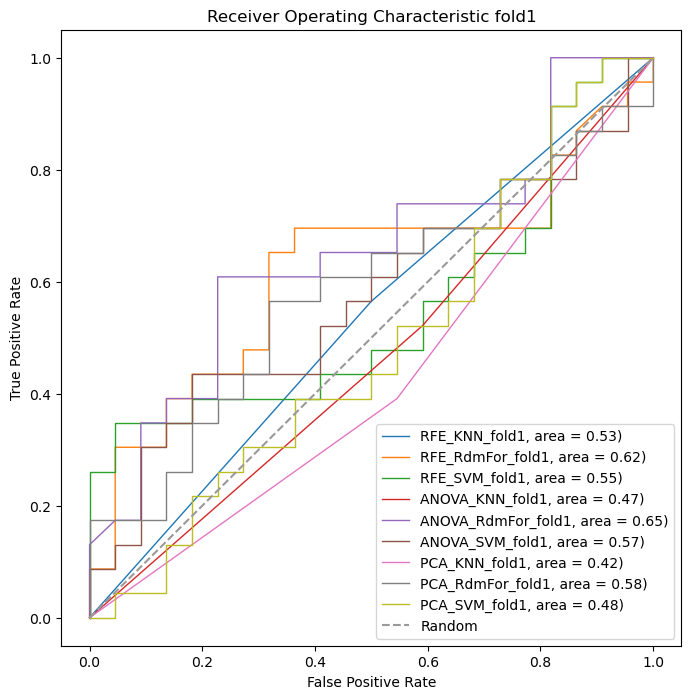

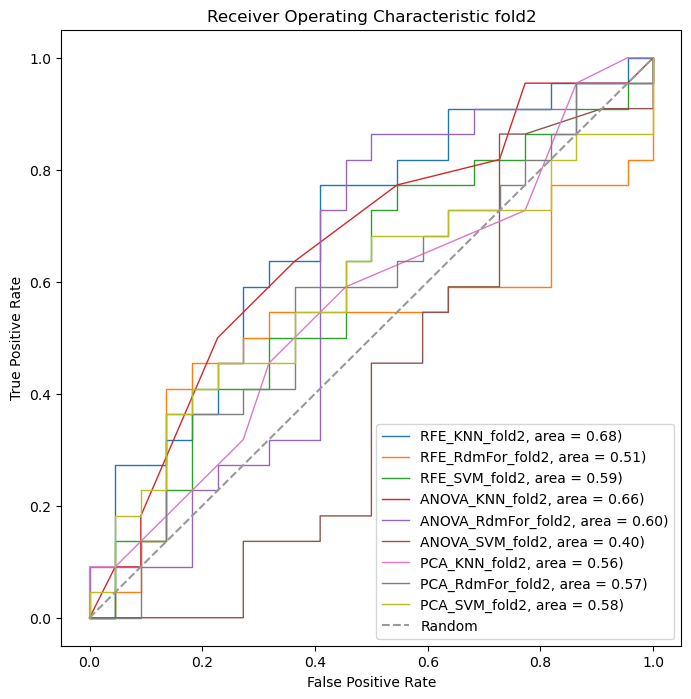

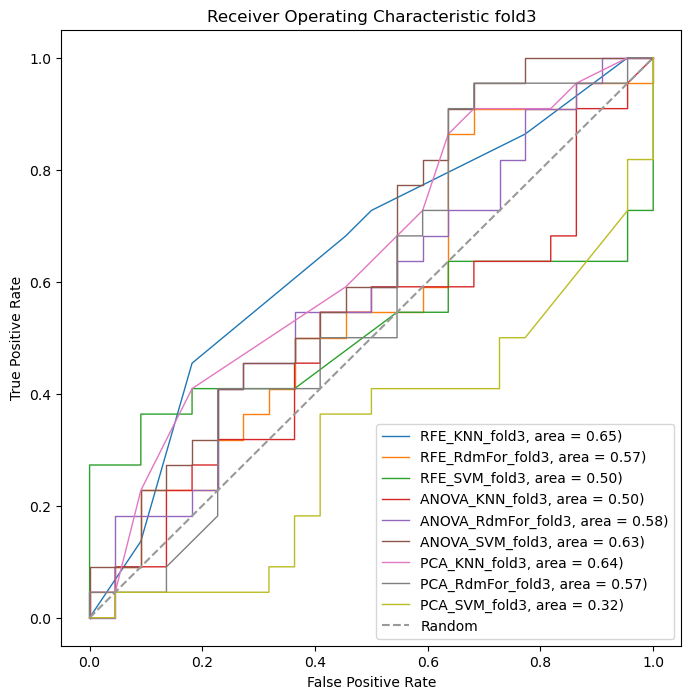

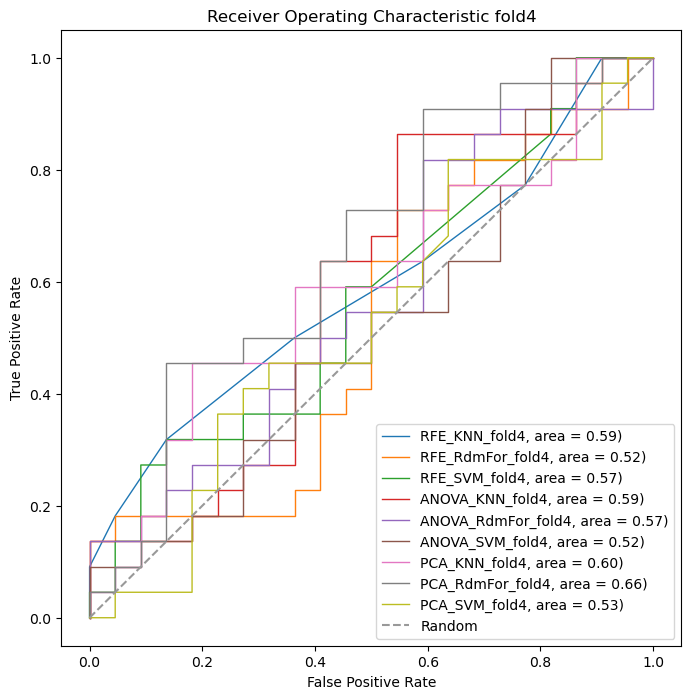

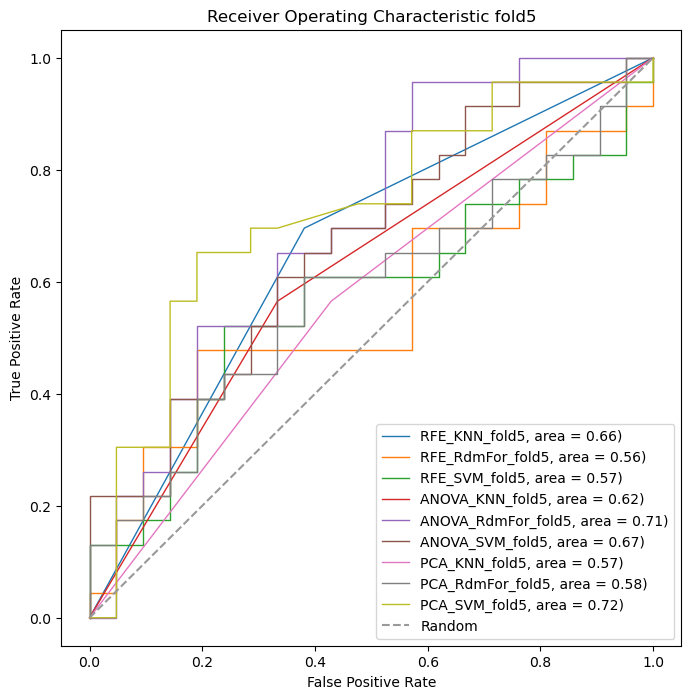

{'ANOVA_RdmFor_fold1': 0.6511857707509882, 'RFE_KNN_fold2': 0.6818181818181818, 'RFE_KNN_fold3': 0.6518595041322314, 'PCA_RdmFor_fold4': 0.6590909090909091, 'PCA_SVM_fold5': 0.7215320910973085}


In [ ]:
## VISUALISATION

# ROC-curves: 5 ROC with 9 graphs
best_comb = {}

# String to look for in the keys
fold_n = ["fold1", "fold2", "fold3", "fold4", "fold5"]
for n in fold_n:
    string_to_find = n
    per_fold = {}
    plt.figure(figsize=(8,8))
    for (tpr_name, tpr), (fpr_name, fpr), (auc_name, auc) in zip(tprs.items(),fprs.items(),aucs.items()):
        if string_to_find in fpr_name and string_to_find in tpr_name and string_to_find in auc_name:
          # Plot ROC curve
          plt.plot(fpr,tpr, lw=1, label=f'{fpr_name}, area = {auc:.2f})')

          per_fold[fpr_name] = auc
    max_auc = max(zip(per_fold.values(), per_fold.keys()))[1]
    best_comb[max_auc] = per_fold[max_auc]

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic '+n)
    plt.legend(loc="lower right")
    plt.show()

print(best_comb)


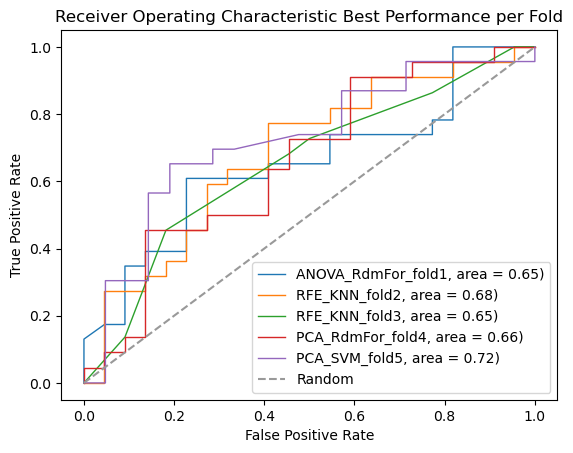

In [ ]:
# ROC-curve: 1 ROC met beste van elke fold

# Plot every best ROC per fold
plt.figure()
for best in best_comb:
    string_to_find = best
    for (tpr_name, tpr), (fpr_name, fpr), (auc_name, auc) in zip(tprs.items(),fprs.items(),aucs.items()):
        if string_to_find in fpr_name and string_to_find in tpr_name and string_to_find in auc_name:

            # Plot ROC curve
            plt.plot(fpr,tpr, lw=1, label=f'{fpr_name}, area = {auc:.2f})')

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic Best Performance per Fold')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 5 Tables with best curve per fold

for best in best_comb:

    table = [["Accuracy","Precision","Recall", "f1", "AUC"],
                [accuracies[best], precisions[best], recalls[best],
                    f1_scores[best], aucs[best]]]
    table = tabulate(table, headers='firstrow',tablefmt='fancy_grid')
    print(best)
    print(table)

ANOVA_RdmFor_fold1
╒════════════╤═════════════╤══════════╤══════════╤══════════╕
│   Accuracy │   Precision │   Recall │       f1 │      AUC │
╞════════════╪═════════════╪══════════╪══════════╪══════════╡
│   0.622222 │     0.62253 │  0.62253 │ 0.622222 │ 0.651186 │
╘════════════╧═════════════╧══════════╧══════════╧══════════╛
RFE_KNN_fold2
╒════════════╤═════════════╤══════════╤══════════╤══════════╕
│   Accuracy │   Precision │   Recall │       f1 │      AUC │
╞════════════╪═════════════╪══════════╪══════════╪══════════╡
│   0.659091 │    0.662105 │ 0.659091 │ 0.657499 │ 0.681818 │
╘════════════╧═════════════╧══════════╧══════════╧══════════╛
RFE_KNN_fold3
╒════════════╤═════════════╤══════════╤══════════╤═════════╕
│   Accuracy │   Precision │   Recall │       f1 │     AUC │
╞════════════╪═════════════╪══════════╪══════════╪═════════╡
│   0.613636 │    0.615789 │ 0.613636 │ 0.611832 │ 0.65186 │
╘════════════╧═════════════╧══════════╧══════════╧═════════╛
PCA_RdmFor_fold4
╒══════════

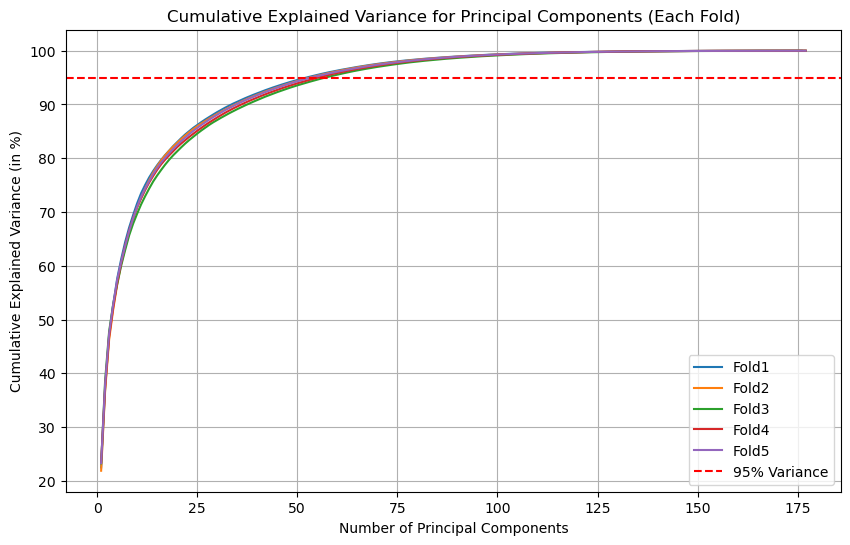

In [ ]:
# Initialize a figure to plot the cumulative explained variance for each fold
plt.figure(figsize=(10, 6))

# Loop over each fold
for i, (train, validation) in enumerate(cv.split(x_design, y_design)):
    # Scaling
    scaler = preprocessing.StandardScaler()
    x_train = scaler.fit_transform(x_design[train])

    # PCA
    pca_p = PCA()
    pca_p.fit(x_train)

    # Calculate cumulative explained variance
    explained_variance = pca_p.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance) * 100

    # Plot the cumulative explained variance for this fold
    plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, label=f'Fold{i+1}')
plt.axhline(y=95, color='r', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance for Principal Components (Each Fold)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (in %)')
plt.grid(True)
plt.legend()
plt.show()


## Model selection

In [ ]:

# Create a list to store the data
auc_table = []

# Get the unique classifier names
classifiers = set(key.rsplit('_', 1)[0] for key in aucs.keys())

# Calculate mean and standard deviation for each classifier
for classifier in classifiers:
    aucss = [aucs[f'{classifier}_fold{i}'] for i in range(1, 6)]
    mean_auc = np.mean(aucss)
    std_dev_auc = np.std(aucss)
    auc_table.append([classifier, mean_auc, std_dev_auc])

# Create a DataFrame
df = pd.DataFrame(auc_table, columns=['Classifier', 'Mean AUC', 'Std Dev'])

# Sort the DataFrame based on Mean AUC
df = df.sort_values('Mean AUC', ascending=False)

# Print the DataFrame
print(df)

     Classifier  Mean AUC   Std Dev
7       RFE_KNN  0.622909  0.054171
4  ANOVA_RdmFor  0.620612  0.051859
5    PCA_RdmFor  0.592479  0.033704
3     ANOVA_KNN  0.565238  0.073307
0     ANOVA_SVM  0.558101  0.095391
8       RFE_SVM  0.558033  0.029997
1       PCA_KNN  0.557340  0.072844
6    RFE_RdmFor  0.556375  0.037474
2       PCA_SVM  0.526475  0.129627


## Testing

In [ ]:
# Scaling
scaler = preprocessing.StandardScaler()
x_test1 = scaler.fit_transform(x_test,y_test)
x_design1 = scaler.fit_transform(x_design,y_design)

# create empty dictionaries
models_final = {}
accuracies_final = {}
precisions_final = {}
recalls_final = {}
f1_scores_final = {}
fprs_final = {}
tprs_final = {}
thresholds_final = {}
aucs_final = {}

feat = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

# Hyperparameters
# Knn
parameters_knn = {'n_neighbors': list(range(1, 26, 2)), 'weights': ['uniform','distance']}
clf_knn = KNeighborsClassifier()
para_knn = RandomizedSearchCV(clf_knn, parameters_knn,  error_score='raise', cv=5)

# KNeighbours
best_knn = para_knn.fit(x_train,y_train)
optim_nn = best_knn.best_estimator_.get_params()
classif = KNeighborsClassifier(n_neighbors=optim_nn['n_neighbors'],
                                weights=optim_nn['weights'])

# Make pipeline
pipe = make_pipeline(feat, classif)

pipe.fit(x_design1, y_design)

model_name = 'RFE_KNN'
# Save model
models_final[model_name] = pipe

probas_ = pipe.predict_proba(x_test1)

fpr, tpr, threshold = roc_curve(y_test, probas_[:, 1])
rocauc = roc_auc_score(y_test, probas_[:, 1])

y_pred = pipe.predict(x_test1)

#Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Save metrics
accuracies_final[model_name] = accuracy
precisions_final[model_name] = precision
recalls_final[model_name] = recall
f1_scores_final[model_name] = f1
fprs_final[model_name] = fpr
tprs_final[model_name] = tpr
thresholds_final[model_name] = threshold
aucs_final[model_name] = rocauc

# Time functions for tracking during training
start_time = time.time()  # capture the start time
end_time = time.time()  # capture the end time
runtime = (end_time - start_time)/60  # calculate the runtime

print(f'Training completed of {model_name} in {runtime:.2f} minutes')


Training completed of PCA_Random_Forest in 0.00 minutes


In [ ]:
for model in models_final:
    table = [["Accuracy","Precision","Recall", "f1", "AUC"],
                        [accuracies_final[model], precisions_final[model], recalls_final[model],
                         f1_scores_final[model], aucs_final[model]]]
    table = tabulate(table, headers='firstrow',tablefmt='fancy_grid')
    print(model)
    print(table)


PCA_Random_Forest
╒════════════╤═════════════╤══════════╤══════════╤══════════╕
│   Accuracy │   Precision │   Recall │       f1 │      AUC │
╞════════════╪═════════════╪══════════╪══════════╪══════════╡
│       0.52 │    0.522727 │ 0.522436 │ 0.519231 │ 0.660256 │
╘════════════╧═════════════╧══════════╧══════════╧══════════╛


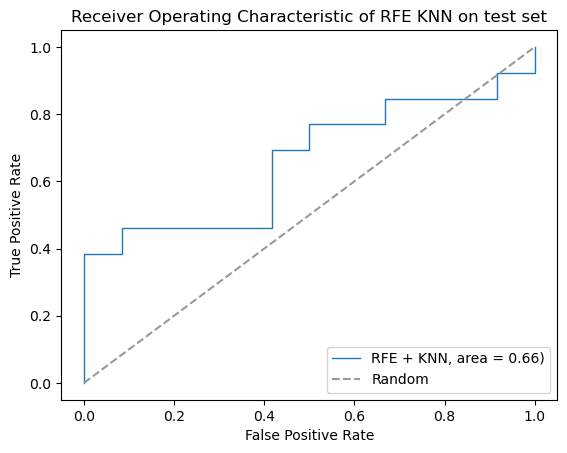

In [ ]:
# ROC-curve: van testset

# Plot every best ROC per fold
plt.figure()
for (tpr_name, tpr), (fpr_name, fpr), (auc_name, auc) in zip(tprs_final.items(),fprs_final.items(),aucs_final.items()):

    # Plot ROC curve
    plt.plot(fpr,tpr, lw=1, label=f'RFE + KNN, area = {auc:.2f})')

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of RFE KNN on test set')
plt.legend(loc="lower right")
plt.show()